# Introduction to ML Strategy

## Why ML Strategy
- A good ML strategy gives you directions in how to progress efficiently, given all the following ideas.

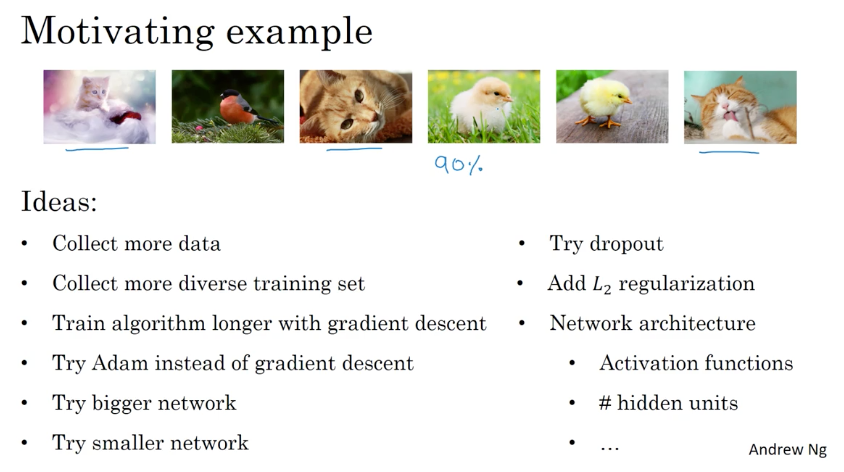

## Orthogonalization
- The most effective machine learning people are very clear-eyed about what to tune in order to achieve one effect.
    - This is a process called **orthogonalization**.
- **Chain of Assumptions in ML and Tuning Strategies**
    - Fit training set well on cost function
        - Bigger network
        - Adam...
    - Fit dev set well on cost function
        - Regularization
        - Bigger training set
    - Fit test set well on cost function
        - Bigger dev set
    - Performs well in real world
        - Change the dev set or cost function
- About **Early Stopping**
    - Early stopping is not as orthogonalized, as it affects performances on both training set and dev set simultaneously. 
    - That's why Andrew Ng doesn't use it as much.

# Setting Up Your Goal

## Single Number Evaluation Metric
- As an example, we can use both **precision** and **recall** to evaluate the performance of classifiers.
    - Precision: % of recognized cats are actual cats
    - Recall: % of actual cats are correctly recognized
- The problem arises when one model has a higher precision, while the other has a higher recall.
- To solve this problem, we need to use a single number evaluation metric called **FI score**, which can be considered the "average" of precision and recall.
    - $FI = \frac{2}{\frac{1}{P} + \frac{1}{R}}$

## Satisficing and Optimizing Metric
- Assuming that there are $N$ metrics that we care about.
- We can select the single metric that we care about the most as the **optimizing** metric, and then set the other $N-1$ metrics as **satisfying** metrics with thresholds.
- E.g. We pick the model that maximizes accuracy subject to running time $\leq 100ms$
    - Optimizing: accuracy
    - Satisfying: running time

## Train/Dev/Test Distributions
- The best practice is to make sure the **dev and test** sets come from the **same distribution**.
- In the example below, instead of dividing train/dev/test sets by regions, a better practice is to **randomly shuffle** all the data and divide data by proportion.

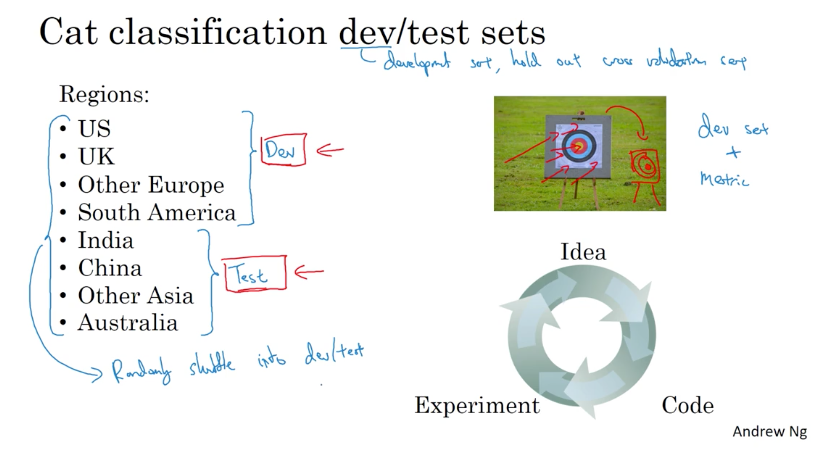

- Guideline
    - Choose a dev set and test set to reflect data you expect to get in the future and consider important to do well on, where the dev set and test set should come from the same distribution.